In [1]:
import gzip
import pandas as pd
import numpy as np
from mnist import MNIST
import torch
from torch import nn
import copy
import torch.optim as optim
import torch.nn.functional as F

In [2]:
fake_data_file_path = "Data/fake_data_generated.csv"
Discriminator_model_file_path = "Model/Discriminator_model.pt"
GAN_model_file_path = "Model/GAN_model.pt"

In [3]:
def random_array_generation(array_size, no_of_array):
    array_generated = np.random.rand(no_of_array, array_size)
    return array_generated

In [4]:
mndata = MNIST('Data')
#images, labels = mndata.load_training()
images, labels = mndata.load_testing()

#print(labels)
len(images[0])

real_input_tensor = torch.Tensor(images)
real_output_tensor = torch.Tensor([1 for i in range(real_input_tensor.size(0))])

In [5]:
fake_data = 1
if fake_data == 0:
    array_generated = random_array_generation(100, 10000)
    np.savetxt(fake_data_file_path, array_generated, delimiter=",")
else:
    array_generated = pd.read_csv(fake_data_file_path, header = None)

fake_input_tensor = torch.Tensor(array_generated.values)
fake_output_tensor = torch.Tensor([0 for i in range(fake_input_tensor.size(0))])

In [6]:
real_input_tensor[0]
#real_output_tensor
fake_input_tensor[0]

tensor([0.8113, 0.8830, 0.1161, 0.9041, 0.8295, 0.5640, 0.9597, 0.6732, 0.0773,
        0.1733, 0.2507, 0.6257, 0.9794, 0.8131, 0.3409, 0.2037, 0.1561, 0.0355,
        0.5426, 0.2767, 0.3555, 0.7762, 0.0477, 0.5486, 0.8409, 0.4584, 0.2002,
        0.7612, 0.9665, 0.6159, 0.1208, 0.2811, 0.6921, 0.0898, 0.7824, 0.8461,
        0.4351, 0.9992, 0.0376, 0.0379, 0.6627, 0.2711, 0.9265, 0.7212, 0.3231,
        0.1601, 0.4817, 0.1492, 0.5890, 0.4626, 0.2383, 0.6736, 0.7089, 0.3591,
        0.5928, 0.4461, 0.3668, 0.2426, 0.3939, 0.3521, 0.2196, 0.7634, 0.2150,
        0.8353, 0.6717, 0.5992, 0.1051, 0.9078, 0.4213, 0.4814, 0.1232, 0.9127,
        0.4303, 0.7778, 0.7342, 0.6365, 0.2763, 0.2299, 0.8172, 0.6221, 0.7781,
        0.4370, 0.7914, 0.7638, 0.9722, 0.0175, 0.2349, 0.3645, 0.2698, 0.4705,
        0.3708, 0.1050, 0.1174, 0.5793, 0.8773, 0.4560, 0.3683, 0.7286, 0.3473,
        0.1747])

In [7]:
fake_input_tensor.size(0)
fake_output_tensor

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [8]:
class GAN_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(GAN_Model, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 512)
        self.fc3 = nn.Linear(512, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [9]:
class Discriminator_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Discriminator_Model, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

In [64]:
#
learning_rate_Discriminator = 0.08
epoch_size_Discriminator = 5
steps_for_printing_out_loss_Discriminator = 5

Discriminator_Model_WIP = Discriminator_Model(input_size = 784, output_size = 1)

#RNN_model.to(device)
loss_functioin_Discriminator = nn.MSELoss()
optimizer_Discriminator = optim.SGD(Discriminator_Model_WIP.parameters(), lr = learning_rate_Discriminator)

input_real = real_input_tensor/ 256
target_real = real_output_tensor
#input_fake = fake_input_tensor
target_fake = fake_output_tensor
print(fake_input_tensor[0])
def Discriminator_training_model():
    input_fake = GAN_Model_WIP(fake_input_tensor)
    #print(input_fake[0])
    for i in range(1, epoch_size_Discriminator + 1):
        optimizer_Discriminator.zero_grad()
        output_real = Discriminator_Model_WIP(input_real)
        loss_real = loss_functioin_Discriminator(output_real, target_real.reshape(output_real.size(0), output_real.size(1)))
        loss_real.backward()
        #loss_real.backward()
        output_fake = Discriminator_Model_WIP(input_fake)
        #print(output_real)
        loss_fake = loss_functioin_Discriminator(output_fake, target_fake.reshape(output_fake.size(0), output_fake.size(1)))
        loss_fake.backward(retain_graph=True)
        #loss_fake.backward()
        optimizer_Discriminator.step()
        loss_Discriminator = loss_real + loss_fake
        print(loss_real.cpu().detach().numpy())
        print(loss_fake.cpu().detach().numpy())
        
        if i % (steps_for_printing_out_loss_Discriminator) == 0:
            print('Loss (epoch: ' + str(i) + '): ' + str(loss_Discriminator.cpu().detach().numpy()))
    torch.save({'state_dict': Discriminator_Model_WIP.state_dict(),'optimizer': optimizer_Discriminator.state_dict()}, Discriminator_model_file_path)

tensor([0.8113, 0.8830, 0.1161, 0.9041, 0.8295, 0.5640, 0.9597, 0.6732, 0.0773,
        0.1733, 0.2507, 0.6257, 0.9794, 0.8131, 0.3409, 0.2037, 0.1561, 0.0355,
        0.5426, 0.2767, 0.3555, 0.7762, 0.0477, 0.5486, 0.8409, 0.4584, 0.2002,
        0.7612, 0.9665, 0.6159, 0.1208, 0.2811, 0.6921, 0.0898, 0.7824, 0.8461,
        0.4351, 0.9992, 0.0376, 0.0379, 0.6627, 0.2711, 0.9265, 0.7212, 0.3231,
        0.1601, 0.4817, 0.1492, 0.5890, 0.4626, 0.2383, 0.6736, 0.7089, 0.3591,
        0.5928, 0.4461, 0.3668, 0.2426, 0.3939, 0.3521, 0.2196, 0.7634, 0.2150,
        0.8353, 0.6717, 0.5992, 0.1051, 0.9078, 0.4213, 0.4814, 0.1232, 0.9127,
        0.4303, 0.7778, 0.7342, 0.6365, 0.2763, 0.2299, 0.8172, 0.6221, 0.7781,
        0.4370, 0.7914, 0.7638, 0.9722, 0.0175, 0.2349, 0.3645, 0.2698, 0.4705,
        0.3708, 0.1050, 0.1174, 0.5793, 0.8773, 0.4560, 0.3683, 0.7286, 0.3473,
        0.1747])


In [65]:
#
learning_rate_GAN = 0.28
epoch_size_GAN = 5
steps_for_printing_out_loss_GAN = 1

GAN_Model_WIP = GAN_Model(input_size = 100, output_size = 784)

#RNN_model.to(device)
loss_functioin_GAN = nn.MSELoss()
optimizer_GAN = optim.SGD(GAN_Model_WIP.parameters(), lr = learning_rate_GAN)
input_GAN = fake_input_tensor
target_GAN = torch.Tensor([1 for i in range(input_GAN.size(0))])
def GAN_training_model():
    for i in range(1, epoch_size_GAN + 1):
        optimizer_GAN.zero_grad()
        output_GAN = Discriminator_Model_WIP(GAN_Model_WIP(input_GAN))
        loss_GAN = loss_functioin_GAN(output_GAN, target_GAN.reshape(output_GAN.size(0), output_GAN.size(1)))
        loss_GAN.backward()
        if i % (steps_for_printing_out_loss_GAN) == 0:
            print('Loss (epoch: ' + str(i) + '): ' + str(loss_GAN.cpu().detach().numpy()))
        optimizer_GAN.step()

    torch.save({'state_dict': GAN_Model_WIP.state_dict(),'optimizer': optimizer_GAN.state_dict()}, GAN_model_file_path)

In [102]:
no_of_training_loop = 10
for i in range(no_of_training_loop):
    Discriminator_training_model()
    GAN_training_model()

0.021590779
0.7001362
Loss (epoch: 1): 0.72172695
0.33205017
0.0009096491
Loss (epoch: 2): 0.33295983
0.08519983
0.059007097
Loss (epoch: 3): 0.14420693
0.05604492
0.00411944
Loss (epoch: 4): 0.060164362
0.026023077
0.0028505072
Loss (epoch: 5): 0.028873583
Loss (epoch: 1): 0.9725793
Loss (epoch: 2): 0.6419667
Loss (epoch: 3): 0.32240754
Loss (epoch: 4): 0.15377317
Loss (epoch: 5): 0.075545155
0.02199151
0.6657448
Loss (epoch: 1): 0.6877363
0.36001343
0.0
Loss (epoch: 2): 0.36001343
0.08116432
0.028412288
Loss (epoch: 3): 0.10957661
0.046413682
0.0015615886
Loss (epoch: 4): 0.047975272
0.02943387
0.001696395
Loss (epoch: 5): 0.031130265
Loss (epoch: 1): 0.9811701
Loss (epoch: 2): 0.74059707
Loss (epoch: 3): 0.41492695
Loss (epoch: 4): 0.20665906
Loss (epoch: 5): 0.10190102
0.026598334
0.61246765
Loss (epoch: 1): 0.639066
0.2900401
0.011055185
Loss (epoch: 2): 0.30109528
0.09848419
0.031080693
Loss (epoch: 3): 0.12956488
0.051352322
0.002062765
Loss (epoch: 4): 0.053415086
0.026647128
0

In [103]:
input_fake = GAN_Model_WIP(fake_input_tensor)

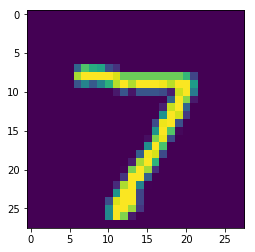

In [113]:
image_out = (input_real[0]).reshape(28, 28).cpu().detach().numpy()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('your_image.png')
imgplot = plt.imshow(image_out)
plt.show()

In [112]:
(input_fake[1] ==input_fake[220])
input_fake[1]

tensor([0.0000, 0.0793, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6248, 0.0000, 0.0098, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0757, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0198,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0045,
        0.0000, 0.0364, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0859, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0077,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3110, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.3814, 0.0068, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0005, 0.2195,
        0.0000, 0.0000, 0.0000, 0.0000, 